In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



In [2]:
# Load the dataset (assumes data is in .xls format)
data = pd.read_csv('default of credit card clients.csv')

# Rename target column for easier access
data.rename(columns={"default payment next month": "default"}, inplace=True)

# Quick check to ensure data is loaded correctly
print(data.head())
print(data.info())


   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
0         0         0         0        1  


(30000, 25)


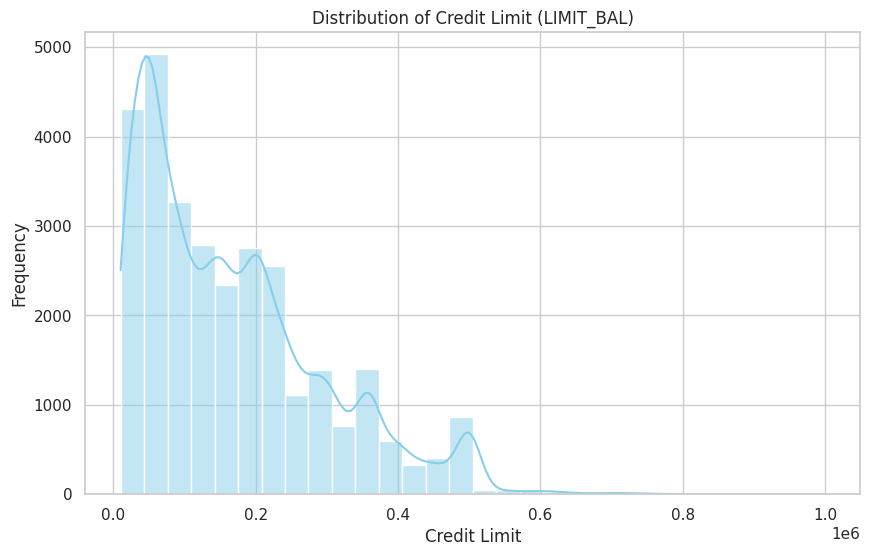

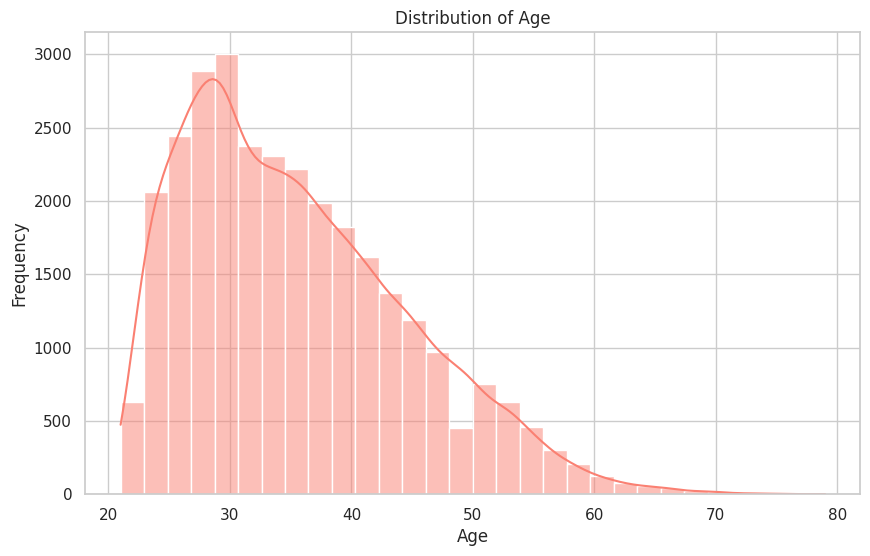

<ipython-input-3-76e97baa5c41>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default', y='LIMIT_BAL', data=data, palette='Set2')


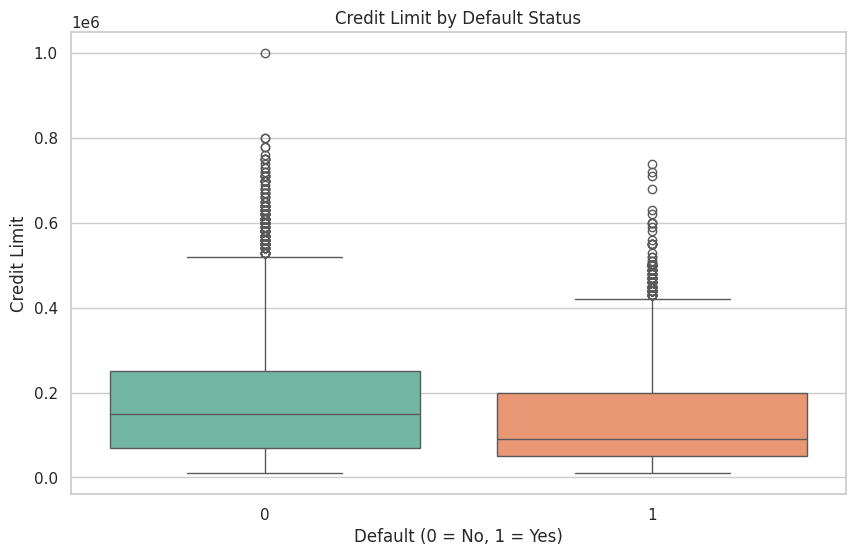

<ipython-input-3-76e97baa5c41>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default', y='AGE', data=data, palette='Set3')


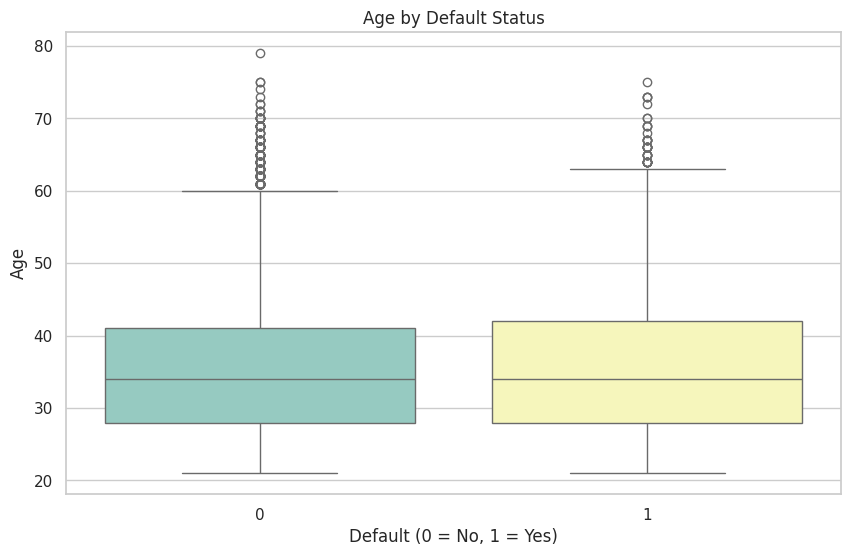

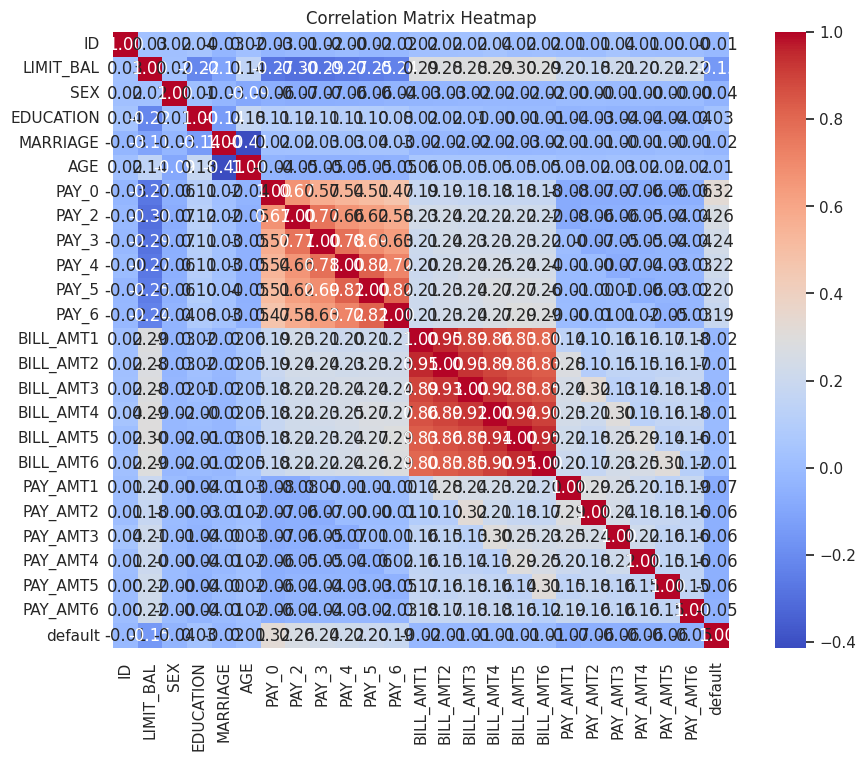

<ipython-input-3-76e97baa5c41>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='EDUCATION', data=data, palette='viridis')


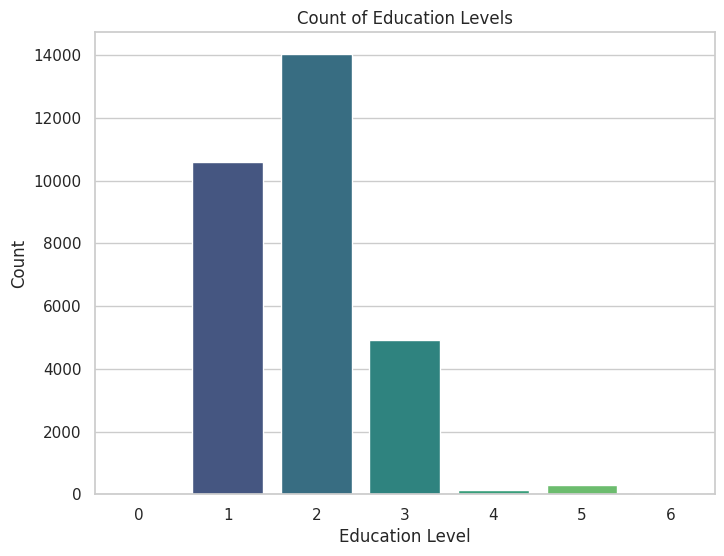

<ipython-input-3-76e97baa5c41>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MARRIAGE', data=data, palette='viridis')


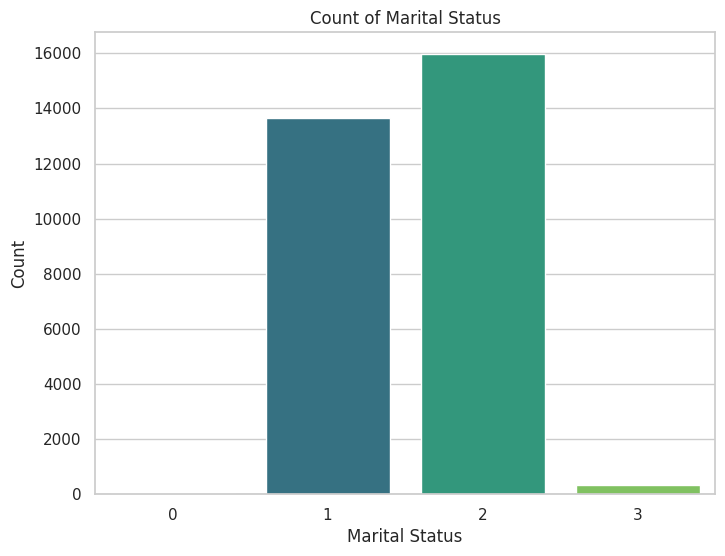

<ipython-input-3-76e97baa5c41>:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SEX', y='default', data=data, palette='Blues', ci=None)
<ipython-input-3-76e97baa5c41>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SEX', y='default', data=data, palette='Blues', ci=None)


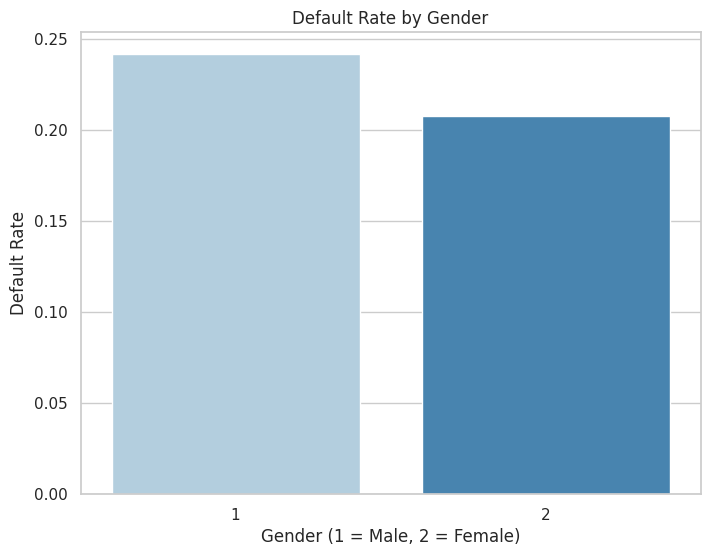

<ipython-input-3-76e97baa5c41>:72: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='EDUCATION', y='default', data=data, palette='Greens', ci=None)
<ipython-input-3-76e97baa5c41>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EDUCATION', y='default', data=data, palette='Greens', ci=None)


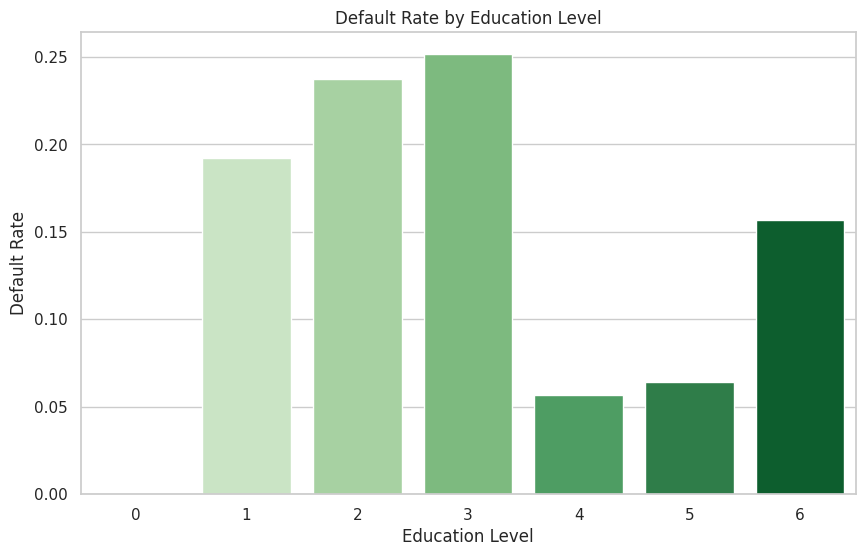

<ipython-input-3-76e97baa5c41>:85: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=pay_data, x='Month', y='Repayment Status', estimator='mean', ci=None, marker='o')


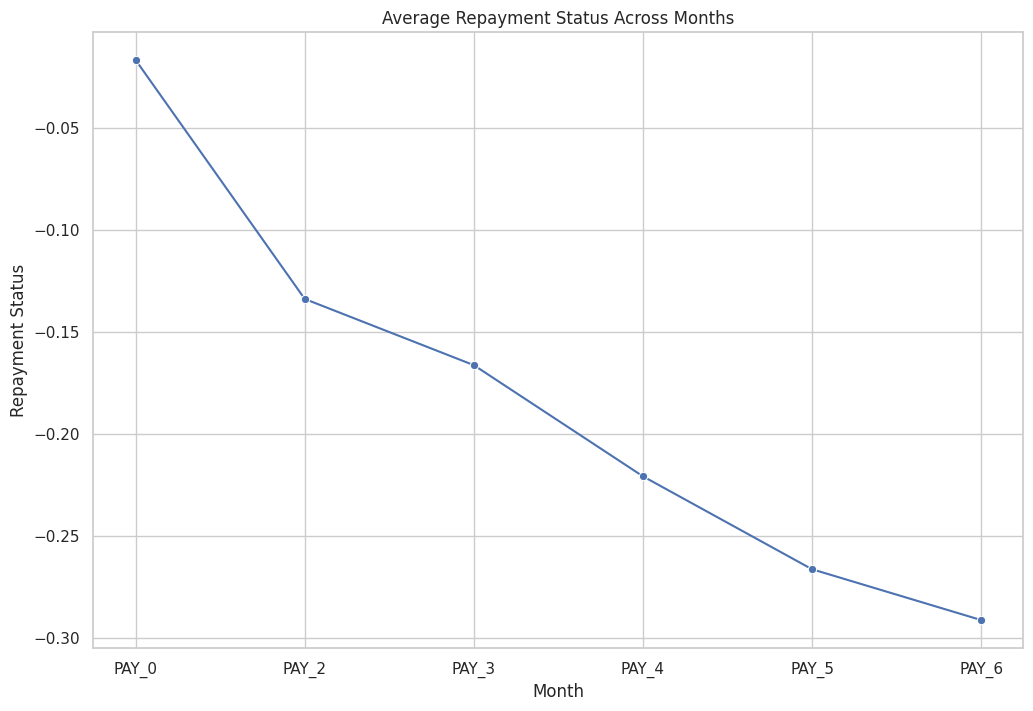

<Figure size 1200x800 with 0 Axes>

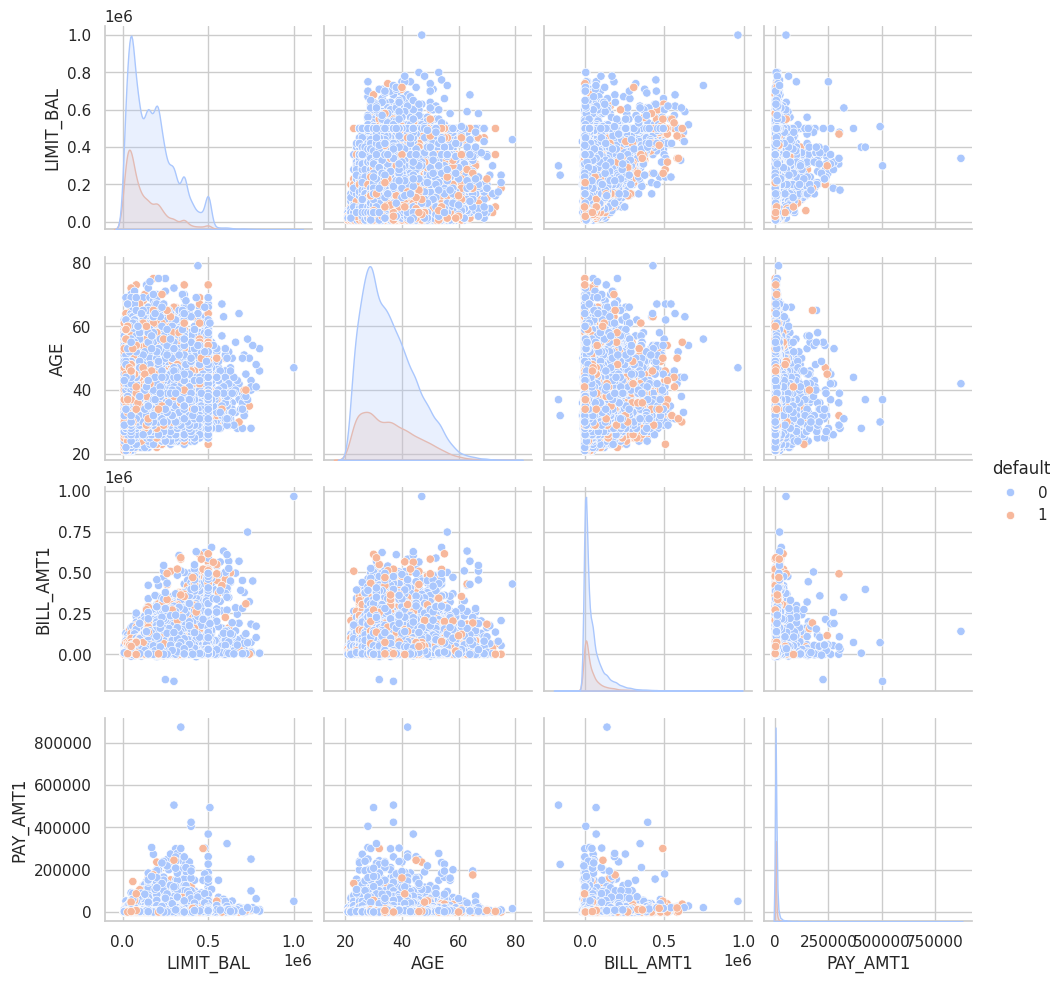

<ipython-input-3-76e97baa5c41>:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='default', y='AGE', data=data, palette='Set1', split=True)


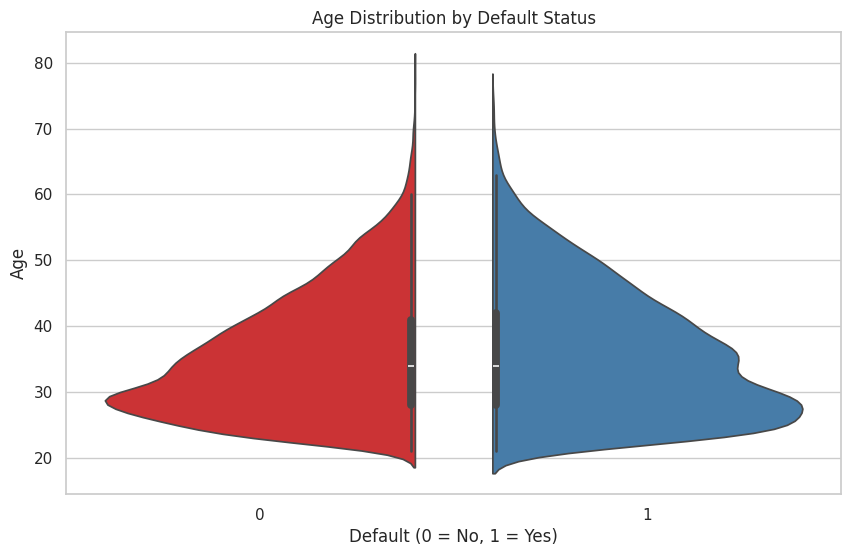

In [3]:
data = data.drop_duplicates()
print(data.shape)

# Set style for better visualization
sns.set(style="whitegrid")

# 1. Distribution of Credit Limit (LIMIT_BAL)
plt.figure(figsize=(10, 6))
sns.histplot(data['LIMIT_BAL'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Credit Limit (LIMIT_BAL)')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.show()

# 2. Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['AGE'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 3. Box Plot for Credit Limit by Default Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='LIMIT_BAL', data=data, palette='Set2')
plt.title('Credit Limit by Default Status')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Credit Limit')
plt.show()

# 4. Box Plot for Age by Default Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='AGE', data=data, palette='Set3')
plt.title('Age by Default Status')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

# 5. Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# 6. Count Plot for Education Levels
plt.figure(figsize=(8, 6))
sns.countplot(x='EDUCATION', data=data, palette='viridis')
plt.title('Count of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

# 7. Count Plot for Marital Status
plt.figure(figsize=(8, 6))
sns.countplot(x='MARRIAGE', data=data, palette='viridis')
plt.title('Count of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# 8. Default Rate by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='SEX', y='default', data=data, palette='Blues', ci=None)
plt.title('Default Rate by Gender')
plt.xlabel('Gender (1 = Male, 2 = Female)')
plt.ylabel('Default Rate')
plt.show()

# 9. Default Rate by Education Level
plt.figure(figsize=(10, 6))
sns.barplot(x='EDUCATION', y='default', data=data, palette='Greens', ci=None)
plt.title('Default Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Default Rate')
plt.show()

# 10. Time Series Plot of Payment History (PAY_0 to PAY_6)
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
pay_data = data[pay_cols].copy()
pay_data['ID'] = data.index  # Adding an ID column to distinguish individuals
pay_data = pd.melt(pay_data, id_vars=['ID'], var_name='Month', value_name='Repayment Status')

plt.figure(figsize=(12, 8))
sns.lineplot(data=pay_data, x='Month', y='Repayment Status', estimator='mean', ci=None, marker='o')
plt.title('Average Repayment Status Across Months')
plt.xlabel('Month')
plt.ylabel('Repayment Status')
plt.show()

# 11. Pair Plot for Numerical Features and Default Status
plt.figure(figsize=(12, 8))
sns.pairplot(data, vars=['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1'], hue='default', palette='coolwarm')
plt.show()

# 12. Violin Plot for Age by Default Status
plt.figure(figsize=(10, 6))
sns.violinplot(x='default', y='AGE', data=data, palette='Set1', split=True)
plt.title('Age Distribution by Default Status')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


In [4]:
scaler = StandardScaler()
numerical_features = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'] + \
                     [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]

data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [7]:
# Define the list of categorical features
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

# One-hot encoding for categorical variables for Logistic Regression
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = one_hot_encoder.fit_transform(data[categorical_features])
encoded_feature_names = one_hot_encoder.get_feature_names_out(categorical_features)  # Use get_feature_names here

# Convert to DataFrame and concatenate with original data
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=data.index)
data_encoded = pd.concat([data.drop(columns=categorical_features), encoded_df], axis=1)

# Check the transformed data
print(data_encoded.head())


   ID  LIMIT_BAL       AGE     PAY_0     PAY_2     PAY_3     PAY_4     PAY_5  \
0   1  -1.136720 -1.246020  1.794564  1.782348 -0.696663 -0.666599 -1.530046   
1   2  -0.365981 -1.029047 -0.874991  1.782348  0.138865  0.188746  0.234917   
2   3  -0.597202 -0.161156  0.014861  0.111736  0.138865  0.188746  0.234917   
3   4  -0.905498  0.164303  0.014861  0.111736  0.138865  0.188746  0.234917   
4   5  -0.905498  2.334029 -0.874991  0.111736 -0.696663  0.188746  0.234917   

      PAY_6  BILL_AMT1  ...  SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  \
0 -1.486041  -0.642501  ...    1.0          0.0          1.0          0.0   
1  1.992316  -0.659219  ...    1.0          0.0          1.0          0.0   
2  0.253137  -0.298560  ...    1.0          0.0          1.0          0.0   
3  0.253137  -0.057491  ...    1.0          0.0          1.0          0.0   
4  0.253137  -0.578618  ...    0.0          0.0          1.0          0.0   

   EDUCATION_4  EDUCATION_5  EDUCATION_6  MARRIAGE_1  MA

In [8]:
label_encoder = LabelEncoder()
data_encoded_rf = data.copy()
for feature in categorical_features:
    data_encoded_rf[feature] = label_encoder.fit_transform(data_encoded_rf[feature])

# Check the transformed data for Random Forest
print(data_encoded_rf.head())



   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
0   1  -1.136720    1          2         1 -1.246020  1.794564  1.782348   
1   2  -0.365981    1          2         2 -1.029047 -0.874991  1.782348   
2   3  -0.597202    1          2         2 -0.161156  0.014861  0.111736   
3   4  -0.905498    1          2         1  0.164303  0.014861  0.111736   
4   5  -0.905498    0          2         1  2.334029 -0.874991  0.111736   

      PAY_3     PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0 -0.696663 -0.666599  ...  -0.672497  -0.663059  -0.652724 -0.341942   
1  0.138865  0.188746  ...  -0.621636  -0.606229  -0.597966 -0.341942   
2  0.138865  0.188746  ...  -0.449730  -0.417188  -0.391630 -0.250292   
3  0.138865  0.188746  ...  -0.232373  -0.186729  -0.156579 -0.221191   
4 -0.696663  0.188746  ...  -0.346997  -0.348137  -0.331482 -0.221191   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
0 -0.227086 -0.296801 -0.308063 -0.314136

In [9]:
# For Logistic Regression and other models with one-hot encoding
X = data_encoded.drop('default', axis=1)
y = data_encoded['default']

# For Random Forest with label encoding
X_rf = data_encoded_rf.drop('default', axis=1)
y_rf = data_encoded_rf['default']


In [10]:
# Train-test split for both Logistic Regression and Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      7040
           1       0.37      0.64      0.47      1960

    accuracy                           0.69      9000
   macro avg       0.63      0.67      0.63      9000
weighted avg       0.77      0.69      0.71      9000



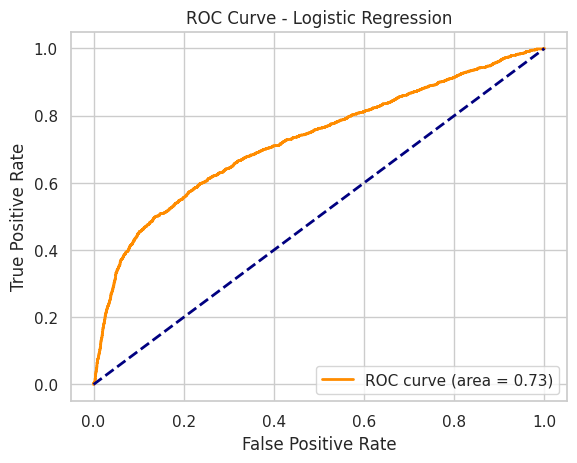

In [11]:
# Train Logistic Regression model with class_weight
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.64      0.33      0.44      1960

    accuracy                           0.81      9000
   macro avg       0.74      0.64      0.66      9000
weighted avg       0.79      0.81      0.79      9000



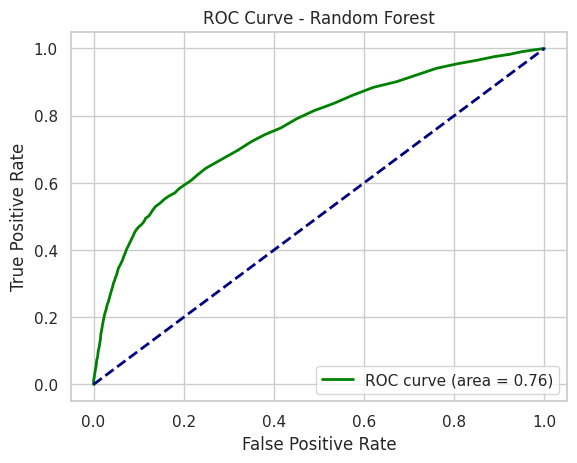

In [12]:
# Train Random Forest model with class_weight
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_clf.fit(X_train_rf, y_train_rf)

# Predictions
y_pred_rf = rf_clf.predict(X_test_rf)
y_prob_rf = rf_clf.predict_proba(X_test_rf)[:, 1]

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test_rf, y_pred_rf))

# ROC Curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_rf, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


In [13]:
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}


In [16]:
# Initialize Logistic Regression with class weighting
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')

# Perform 5-fold cross-validation
cv_results_log_reg = cross_validate(log_reg, X, y, cv=5, scoring=scoring_metrics)

# Print mean and standard deviation of each metric
print("Logistic Regression Cross-Validation Results:")
for metric in scoring_metrics:
    mean_score = cv_results_log_reg[f'test_{metric}'].mean()
    std_score = cv_results_log_reg[f'test_{metric}'].std()
    print(f"{metric.capitalize()}: Mean = {mean_score:.4f}, Std = {std_score:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross-Validation Results:
Accuracy: Mean = 0.6897, Std = 0.0498
Precision: Mean = 0.3889, Std = 0.0502
Recall: Mean = 0.6401, Std = 0.0378
F1: Mean = 0.4801, Std = 0.0290
Roc_auc: Mean = 0.7236, Std = 0.0158


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# Initialize Random Forest with class weighting
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Perform 5-fold cross-validation
cv_results_rf = cross_validate(rf_clf, X_rf, y_rf, cv=5, scoring=scoring_metrics)

# Print mean and standard deviation of each metric
print("\nRandom Forest Cross-Validation Results:")
for metric in scoring_metrics:
    mean_score = cv_results_rf[f'test_{metric}'].mean()
    std_score = cv_results_rf[f'test_{metric}'].std()
    print(f"{metric.capitalize()}: Mean = {mean_score:.4f}, Std = {std_score:.4f}")



Random Forest Cross-Validation Results:
Accuracy: Mean = 0.8066, Std = 0.0160
Precision: Mean = 0.7149, Std = 0.0930
Recall: Mean = 0.2476, Std = 0.1469
F1: Mean = 0.3331, Std = 0.1735
Roc_auc: Mean = 0.7567, Std = 0.0237


In [18]:
scoring = 'roc_auc'  # Define scoring metric


Best parameters for Logistic Regression: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC AUC for Logistic Regression: 0.7236753270944467

Logistic Regression (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      7040
           1       0.37      0.65      0.47      1960

    accuracy                           0.69      9000
   macro avg       0.63      0.67      0.63      9000
weighted avg       0.77      0.69      0.71      9000



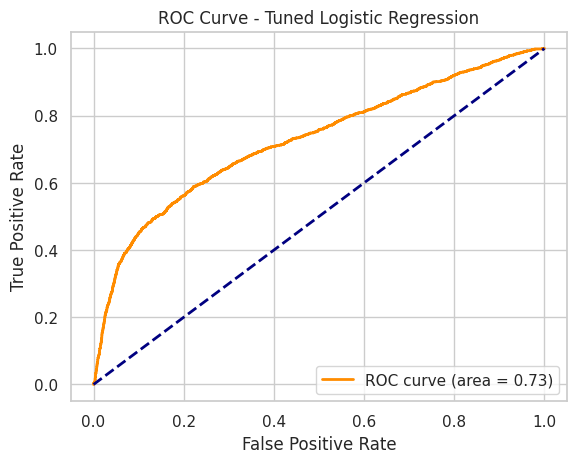

In [19]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Logistic Regression
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],      # Regularization strength
    'solver': ['liblinear', 'lbfgs'],   # Solvers compatible with class_weight
    'penalty': ['l2'],                  # L2 regularization
    'max_iter': [1000]
}

# GridSearchCV for Logistic Regression
log_reg_grid = GridSearchCV(LogisticRegression(class_weight='balanced'), log_reg_params, cv=5, scoring=scoring, n_jobs=-1)
log_reg_grid.fit(X, y)

# Best hyperparameters and corresponding score
print("Best parameters for Logistic Regression:", log_reg_grid.best_params_)
print("Best ROC AUC for Logistic Regression:", log_reg_grid.best_score_)

# Evaluate on the test set with the best model
log_reg_best = log_reg_grid.best_estimator_
y_pred_best = log_reg_best.predict(X_test)
y_prob_best = log_reg_best.predict_proba(X_test)[:, 1]

# Print classification report and ROC AUC score
print("\nLogistic Regression (Tuned) Classification Report:")
print(classification_report(y_test, y_pred_best))

# ROC curve for the best model
fpr_best, tpr_best, _ = roc_curve(y_test, y_prob_best)
roc_auc_best = auc(fpr_best, tpr_best)

plt.figure()
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_best)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Logistic Regression')
plt.legend(loc="lower right")
plt.show()


Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
Best ROC AUC for Random Forest: 0.7631849187309389

Random Forest (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7040
           1       0.57      0.65      0.61      1960

    accuracy                           0.82      9000
   macro avg       0.73      0.76      0.74      9000
weighted avg       0.83      0.82      0.82      9000



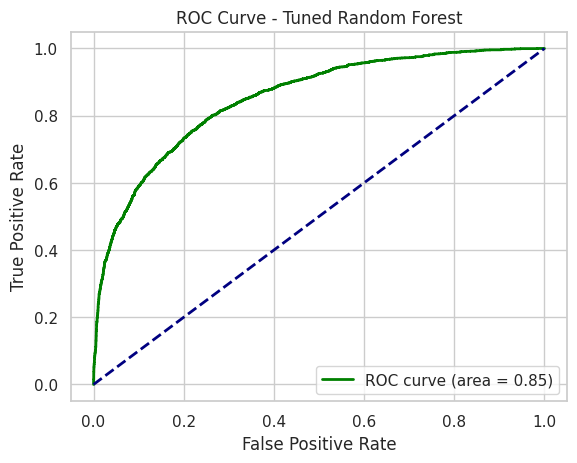

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Reduced parameter grid for RandomizedSearchCV
rf_params = {
    'n_estimators': [50, 100],             # Fewer values for number of trees
    'max_depth': [10, 20],                 # Only two values for max depth
    'max_features': ['sqrt', 'log2'],      # Dropping 'auto' to reduce options
    'min_samples_split': [5, 10],          # Limiting split options
    'min_samples_leaf': [1, 2]             # Reducing leaf options
}

# Initialize RandomizedSearchCV with fewer iterations and fewer folds (cv=3) for faster tuning
rf_random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    rf_params,
    cv=3,                # Using 3-fold cross-validation for speed
    scoring='roc_auc',   # Main scoring metric
    n_jobs=-1,           # Use all available cores
    n_iter=10,           # Number of random parameter combinations to try
    random_state=42
)

# Fit the RandomizedSearchCV
rf_random_search.fit(X_rf, y_rf)

# Best hyperparameters and corresponding score
print("Best parameters for Random Forest:", rf_random_search.best_params_)
print("Best ROC AUC for Random Forest:", rf_random_search.best_score_)

# Evaluate on the test set with the best model
rf_best = rf_random_search.best_estimator_
y_pred_rf_best = rf_best.predict(X_test_rf)
y_prob_rf_best = rf_best.predict_proba(X_test_rf)[:, 1]

# Print classification report and ROC AUC score
print("\nRandom Forest (Tuned) Classification Report:")
print(classification_report(y_test_rf, y_pred_rf_best))

# ROC curve for the best model
fpr_rf_best, tpr_rf_best, _ = roc_curve(y_test_rf, y_prob_rf_best)
roc_auc_rf_best = auc(fpr_rf_best, tpr_rf_best)

# Plot ROC Curve
plt.figure()
plt.plot(fpr_rf_best, tpr_rf_best, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf_best)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Random Forest')
plt.legend(loc="lower right")
plt.show()


In [22]:
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.4/447.4 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/1

In [25]:
import gradio as gr

# Define the prediction function for Logistic Regression
def predict_logistic_regression(LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6,
                                BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6,
                                PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6):
    # Create a DataFrame with the input features
    input_data = pd.DataFrame([[LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6,
                                BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6,
                                PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6]],
                              columns=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
                                       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                                       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                                       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

    # Scale and encode the input data using the pre-fitted scalers and encoders
    input_data[numerical_features] = scaler.transform(input_data[numerical_features])
    input_data_encoded = pd.concat([input_data.drop(columns=categorical_features),
                                    pd.DataFrame(one_hot_encoder.transform(input_data[categorical_features]),
                                                 columns=encoded_feature_names)], axis=1)

    # Predict the probability of default using the tuned logistic regression model
    prob_default = log_reg_best.predict_proba(input_data_encoded)[:, 1][0]
    prediction = "Will Default" if prob_default > 0.5 else "Will Not Default"
    return {"Prediction": prediction, "Default Probability": round(prob_default, 4)}

# Define the prediction function for Random Forest
def predict_random_forest(LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6,
                          BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6,
                          PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6):
    # Create a DataFrame with the input features
    input_data_rf = pd.DataFrame([[LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6,
                                   BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6,
                                   PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6]],
                                 columns=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
                                          'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                                          'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                                          'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

    # Label encode categorical features for Random Forest
    for feature in categorical_features:
        input_data_rf[feature] = label_encoder.transform(input_data_rf[feature])

    # Predict the probability of default using the tuned random forest model
    prob_default_rf = rf_best.predict_proba(input_data_rf)[:, 1][0]
    prediction_rf = "Will Default" if prob_default_rf > 0.5 else "Will Not Default"
    return {"Prediction": prediction_rf, "Default Probability": round(prob_default_rf, 4)}

# Gradio interface setup
input_features = [
    gr.Number(label="Credit Limit (LIMIT_BAL)"),
    gr.Radio(["1", "2"], label="Gender (SEX)"),  # 1=Male, 2=Female
    gr.Radio(["1", "2", "3", "4"], label="Education"),  # 1=Graduate school, 2=University, 3=High school, 4=Other
    gr.Radio(["1", "2", "3"], label="Marital Status (MARRIAGE)"),  # 1=Married, 2=Single, 3=Others
    gr.Number(label="Age"),
    gr.Number(label="Repayment Status (PAY_0)"),
    gr.Number(label="Repayment Status (PAY_2)"),
    gr.Number(label="Repayment Status (PAY_3)"),
    gr.Number(label="Repayment Status (PAY_4)"),
    gr.Number(label="Repayment Status (PAY_5)"),
    gr.Number(label="Repayment Status (PAY_6)"),
    gr.Number(label="Bill Amount 1"),
    gr.Number(label="Bill Amount 2"),
    gr.Number(label="Bill Amount 3"),
    gr.Number(label="Bill Amount 4"),
    gr.Number(label="Bill Amount 5"),
    gr.Number(label="Bill Amount 6"),
    gr.Number(label="Payment Amount 1"),
    gr.Number(label="Payment Amount 2"),
    gr.Number(label="Payment Amount 3"),
    gr.Number(label="Payment Amount 4"),
    gr.Number(label="Payment Amount 5"),
    gr.Number(label="Payment Amount 6"),
]

# Gradio interface for both models
gr_interface_logistic = gr.Interface(fn=predict_logistic_regression, inputs=input_features, outputs=["json"], title="Credit Default Prediction - Logistic Regression")
gr_interface_rf = gr.Interface(fn=predict_random_forest, inputs=input_features, outputs=["json"], title="Credit Default Prediction - Random Forest")

# Launch the app with both interfaces
gr.Interface(fn=predict_logistic_regression, inputs=input_features, outputs="json", title="Credit Default Prediction - Logistic Regression").launch()
gr.Interface(fn=predict_random_forest, inputs=input_features, outputs="json", title="Credit Default Prediction - Random Forest").launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8bbf1cfd0508fdf9b8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1ca30118298e1600ba.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


SyntaxError: incomplete input (<ipython-input-24-b975613e3989>, line 33)